<a href="https://colab.research.google.com/github/biranchi2018/School_of_AI_KL/blob/master/TwitterTextAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Exploration**

In [0]:
import io


In [0]:
# from google.colab import files
# uploaded = files.upload()

In [0]:
# !cat illicittwitter.csv

## Read the data using Pandas

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("illicittwitter.csv")
df.head()

,Tweets,Label
0,@215RegencyRoad: SARAH - 20 YEAR OLD WITH TH...,I
1,@215RegencyRoad: DOMINO - NEW GIRL ON THE BL...,I
2,@215RegencyRoad: ASHLEY: 21 year old shy but ...,I
3,Hi Friends If you are looking Independent mode...,I
4,"b""Catch up with me @Jock2GO, I'm here for the ...",I


In [0]:
df.info

<bound method DataFrame.info of                                                   Tweets Label
0       @215RegencyRoad: SARAH -  20 YEAR OLD WITH TH...     I
1       @215RegencyRoad: DOMINO  - NEW GIRL ON THE BL...     I
2       @215RegencyRoad: ASHLEY: 21 year old shy but ...     I
3      Hi Friends If you are looking Independent mode...     I
4      b"Catch up with me @Jock2GO, I'm here for the ...     I
5      Hi Friends If you are looking Independent mode...     I
6      Hi Friends If you are looking Independent mode...     I
7      HOT GIRLS WHO KNOW HOW TO MAKE YOU SIZZLE....S...     I
8      #Durham #Escort #BumPix #Adultwork - please ma...     I
9      There are hot girls everywhere, but Ukraine is...     I
10      @brendaboobies: #WednesdayMotivation #benaugh...     I
11     x93xb7 Find Top Class GFE/BDSM Model Girl Swet...     I
12     x93xb7 Beautiful Hot Big Ass Kissing Expert Gi...     I
13     OWO Bareback Massage Escorts #erotic #eroticma...     I
14     I am AVAILABLE N

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16238 entries, 0 to 16237
Data columns (total 2 columns):
Tweets    16238 non-null object
Label     16238 non-null object
dtypes: object(2)
memory usage: 253.8+ KB


In [0]:
df.describe()

,Tweets,Label
count,16238,16238
unique,8410,2
top,@NoTimeZone_: Travel the world nHave filthy s...,I
freq,241,10847


## Converting Text Label to Numbers

In [0]:
from io import StringIO
df.columns = ["Tweets", "Label"]
df['Label'] = df['Label'].factorize()[0]
category_id_df = df[["Tweets", "Label"]].drop_duplicates().sort_values('Label')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['Tweets', 'Label']].values)
df.head()

,Tweets,Label
0,@215RegencyRoad: SARAH - 20 YEAR OLD WITH TH...,0
1,@215RegencyRoad: DOMINO - NEW GIRL ON THE BL...,0
2,@215RegencyRoad: ASHLEY: 21 year old shy but ...,0
3,Hi Friends If you are looking Independent mode...,0
4,"b""Catch up with me @Jock2GO, I'm here for the ...",0


In [0]:
df.tail()

,Tweets,Label
16233,@NoTimeZone_: Travel the world nHave filthy s...,1
16234,"b""Let's have some fun. https://t.co/rOXMWHnxHy...",1
16235,@NoTimeZone_: Travel the world nHave filthy s...,1
16236,@christopheryuan: ... even though people woul...,1
16237,b'orideo XXX free xxx XXX girlfriend sex video...,0


In [0]:
df.head(10)

,Tweets,Label
0,@215RegencyRoad: SARAH - 20 YEAR OLD WITH TH...,0
1,@215RegencyRoad: DOMINO - NEW GIRL ON THE BL...,0
2,@215RegencyRoad: ASHLEY: 21 year old shy but ...,0
3,Hi Friends If you are looking Independent mode...,0
4,"b""Catch up with me @Jock2GO, I'm here for the ...",0
5,Hi Friends If you are looking Independent mode...,0
6,Hi Friends If you are looking Independent mode...,0
7,HOT GIRLS WHO KNOW HOW TO MAKE YOU SIZZLE....S...,0
8,#Durham #Escort #BumPix #Adultwork - please ma...,0
9,"There are hot girls everywhere, but Ukraine is...",0


In [0]:
category_id_df.head()

,Tweets,Label
0,@215RegencyRoad: SARAH - 20 YEAR OLD WITH TH...,0
10410,b'k hentai dana dearmond? XXX Sexy videos XXX ...,0
10409,b'XXX lesbian videos XXX hardcore vi? XXX Porn...,0
10407,b'Youporn Videos Manga Porno Tu Kiff XXX india...,0
10406,b'sloppy french porn cartoon sex videos cum sw...,0


In [0]:
list(id_to_category.items())[:5]

[(" @215RegencyRoad: SARAH -  20 YEAR OLD WITH THICK LIPS n#parlour #215girls #massage #escort https://t.co/sSxIVK7Rai'",
  0),
 ("b'k hentai dana dearmond? XXX Sexy videos XXX videos TeenPorn Salopes Sex Black Ass Xxx video Bonne Baise XXX porno v2x80xa6 https://t.co/DTu1enXcan'",
  0),
 ("b'XXX lesbian videos XXX hardcore vi? XXX Porno Amateur et Se XXX SEX XXX Atelier XXX girls clips XXX pussy XXX POR2x80xa6 https://t.co/nf4OxfXVdG'",
  0),
 ("b'Youporn Videos Manga Porno Tu Kiff XXX indian boobs virtual sex anal cum? Step sister Sex Swedish Erotica XXX porno2x80xa6 https://t.co/WwzP4gAOLV'",
  0),
 ("b'sloppy french porn cartoon sex videos cum swapping fuck com eurosex pants fake fuck hard bachelorette sloppy blowjo2x80xa6 https://t.co/NFFhvH9bs4'",
  0)]

In [0]:
list(id_to_category.keys())[:5]

[" @215RegencyRoad: SARAH -  20 YEAR OLD WITH THICK LIPS n#parlour #215girls #massage #escort https://t.co/sSxIVK7Rai'",
 "b'k hentai dana dearmond? XXX Sexy videos XXX videos TeenPorn Salopes Sex Black Ass Xxx video Bonne Baise XXX porno v2x80xa6 https://t.co/DTu1enXcan'",
 "b'XXX lesbian videos XXX hardcore vi? XXX Porno Amateur et Se XXX SEX XXX Atelier XXX girls clips XXX pussy XXX POR2x80xa6 https://t.co/nf4OxfXVdG'",
 "b'Youporn Videos Manga Porno Tu Kiff XXX indian boobs virtual sex anal cum? Step sister Sex Swedish Erotica XXX porno2x80xa6 https://t.co/WwzP4gAOLV'",
 "b'sloppy french porn cartoon sex videos cum swapping fuck com eurosex pants fake fuck hard bachelorette sloppy blowjo2x80xa6 https://t.co/NFFhvH9bs4'"]

## Count the labels and graph using Matplotlib

In [0]:
df.groupby('Label').Tweets.count()

Label
0    10847
1     5391
Name: Tweets, dtype: int64

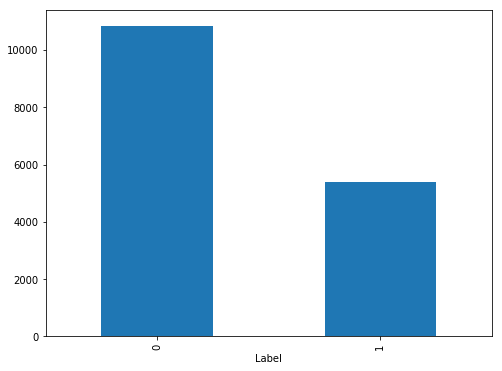

In [0]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Label').Tweets.count().plot.bar(ylim=0)
plt.show()

In [0]:

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Tweets).toarray()
labels = df.Label
features.shape

(16238, 11532)

## **Multi-Class Classifier: Features and Design**

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB




```
Build the model
```



In [0]:
X_train, X_test, y_train, y_test = train_test_split(df['Tweets'], df['Label'], random_state=0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()

X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [0]:
clf

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
X_train_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [0]:
X_train[:5]

7829      @Cliggaveli: "just because I wanna have sex w...
11370    b'@DatUdiBoy Sex before marriage is not seriou...
7400     b'tures XXX British Sex PornStars Videos XXX L...
5293     b'OWO Bareback Massage Escorts #erotic #erotic...
2017     b"Catch up with me @Jock2GO, I'm here for the ...
Name: Tweets, dtype: object

In [0]:
y_train[:5]

7829     1
11370    1
7400     0
5293     0
2017     0
Name: Label, dtype: int64


### ***After fitting the training set, let’s make some predictions.***


In [0]:
X_test[:5]

7492      @tooturnthaleyy: day 268 without sex : damn m...
4235     b'#London #Escort #BumPix #Adultwork - OUT CAL...
15749    b'@DeanMiller1978 @demadalcielo @NPR Nah, we k...
5252     b'Satomi is beautiful eyes has three years exp...
3980     b"#Gloucester #Escort #BumPix #Adultwork - I c...
Name: Tweets, dtype: object

In [0]:
print(clf.predict(count_vect.transform(["b I want sex chat something.... +65002342342. #massage #escort #Sex, #SexChat....."])))

[0]


In [0]:
print(clf.predict(count_vect.transform(["b'I want some sex more money ....."])))

[1]


### ***Model Selection***

We are now ready to experiment with different machine learning models, evaluate their accuracy and find the source of any potential issues.

We will benchmark the following four models:
* Logistic Regression
* (Multinomial) Naive Bayes
* Linear Support Vector Machine
* Random Forest

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

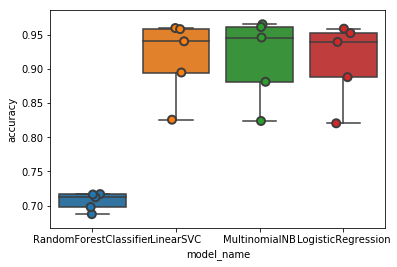

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [0]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.915686
LogisticRegression        0.911744
MultinomialNB             0.915438
RandomForestClassifier    0.706247
Name: accuracy, dtype: float64

 ### ***Model Evaluation ***

Continue with our best model (LinearSVC), we are going to look at the confusion matrix, and show the discrepancies between predicted and actual labels.

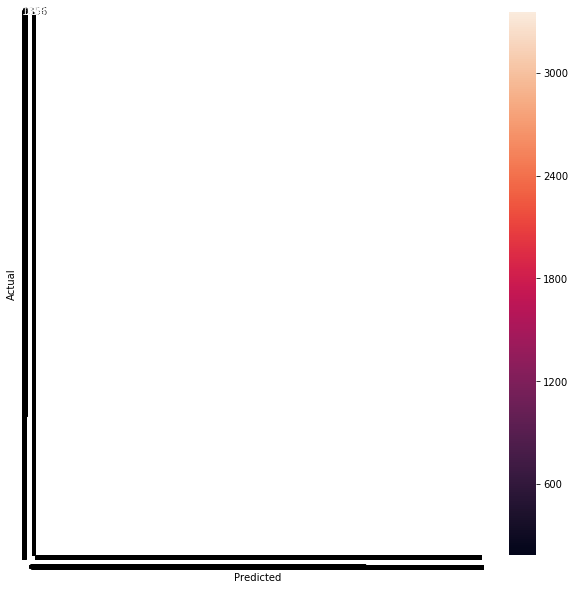

In [0]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Label.values, yticklabels=category_id_df.Label.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

***Misclassifications, and it might be interesting to see what those are caused by:***

In [0]:
from IPython.display import display
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Tweets', 'Label']])
      print('')

AttributeError: ignored

Again, we use the chi-squared test to find the terms that are the most correlated with each of the categories:



In [0]:
model.fit(features, labels)
N = 2
for label, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(label))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

In [0]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))


In [0]:
aprint(metrics.classification_report(y_test, y_pred, target_names=df['label'].unique()))